<a href="https://colab.research.google.com/github/dkmishra2407/machinelearning-/blob/main/decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df = pd.read_csv('/Admission_Predict.csv')
print(df.head())

   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  


In [ ]:
df.shape

(400, 9)

In [ ]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [ ]:
from sklearn.preprocessing import Binarizer

bi = Binarizer(threshold=0.75)

df['Chance of Admit '] = bi.fit_transform(df[['Chance of Admit ']])

In [ ]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1.0
1,2,324,107,4,4.0,4.5,8.87,1,1.0
2,3,316,104,3,3.0,3.5,8.00,1,0.0
3,4,322,110,3,3.5,2.5,8.67,1,1.0
4,5,314,103,2,2.0,3.0,8.21,0,0.0
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,1.0
396,397,325,107,3,3.0,3.5,9.11,1,1.0
397,398,330,116,4,5.0,4.5,9.45,1,1.0
398,399,312,103,3,3.5,4.0,8.78,0,0.0


In [ ]:
input = df.drop('Chance of Admit ',axis=1)

In [ ]:
input

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1,337,118,4,4.5,4.5,9.65,1
1,2,324,107,4,4.0,4.5,8.87,1
2,3,316,104,3,3.0,3.5,8.00,1
3,4,322,110,3,3.5,2.5,8.67,1
4,5,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1
396,397,325,107,3,3.0,3.5,9.11,1
397,398,330,116,4,5.0,4.5,9.45,1
398,399,312,103,3,3.5,4.0,8.78,0


In [ ]:
output = df['Chance of Admit ']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(input,output,test_size=0.25,random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [ ]:
decision = DecisionTreeClassifier()

In [ ]:
decision.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
decision.score(x_test,y_test)

0.9

In [ ]:
y_predct = decision.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test,y_predct)

array([[53,  7],
       [ 3, 37]])

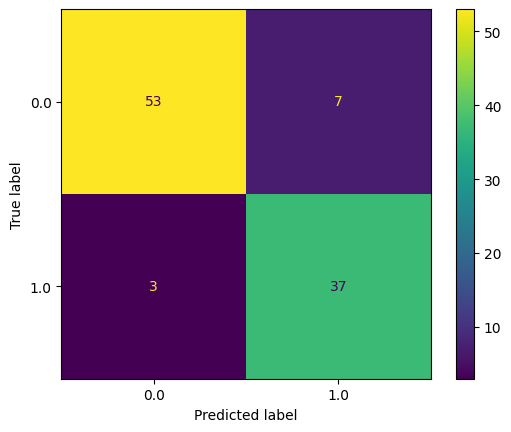

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,y_predct)

In [ ]:
from sklearn.metrics import classification_report
classification_report(y_test,y_predct)

'              precision    recall  f1-score   support\n\n         0.0       0.95      0.88      0.91        60\n         1.0       0.84      0.93      0.88        40\n\n    accuracy                           0.90       100\n   macro avg       0.89      0.90      0.90       100\nweighted avg       0.90      0.90      0.90       100\n'

[Text(0.4880952380952381, 0.9, 'CGPA <= 8.705\ngini = 0.493\nsamples = 300\nvalue = [168.0, 132.0]'),
 Text(0.23809523809523808, 0.7, 'GRE Score <= 326.0\ngini = 0.214\nsamples = 172\nvalue = [151, 21]'),
 Text(0.3630952380952381, 0.8, 'True  '),
 Text(0.19047619047619047, 0.5, 'CGPA <= 8.63\ngini = 0.182\nsamples = 168\nvalue = [151, 17]'),
 Text(0.09523809523809523, 0.3, 'LOR  <= 3.75\ngini = 0.104\nsamples = 146\nvalue = [138, 8]'),
 Text(0.047619047619047616, 0.1, '\n  (...)  \n'),
 Text(0.14285714285714285, 0.1, '\n  (...)  \n'),
 Text(0.2857142857142857, 0.3, 'LOR  <= 4.75\ngini = 0.483\nsamples = 22\nvalue = [13, 9]'),
 Text(0.23809523809523808, 0.1, '\n  (...)  \n'),
 Text(0.3333333333333333, 0.1, '\n  (...)  \n'),
 Text(0.2857142857142857, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.7380952380952381, 0.7, 'GRE Score <= 316.5\ngini = 0.23\nsamples = 128\nvalue = [17, 111]'),
 Text(0.6130952380952381, 0.8, '  False'),
 Text(0.5714285714285714, 0.5, 'Serial No. <= 28

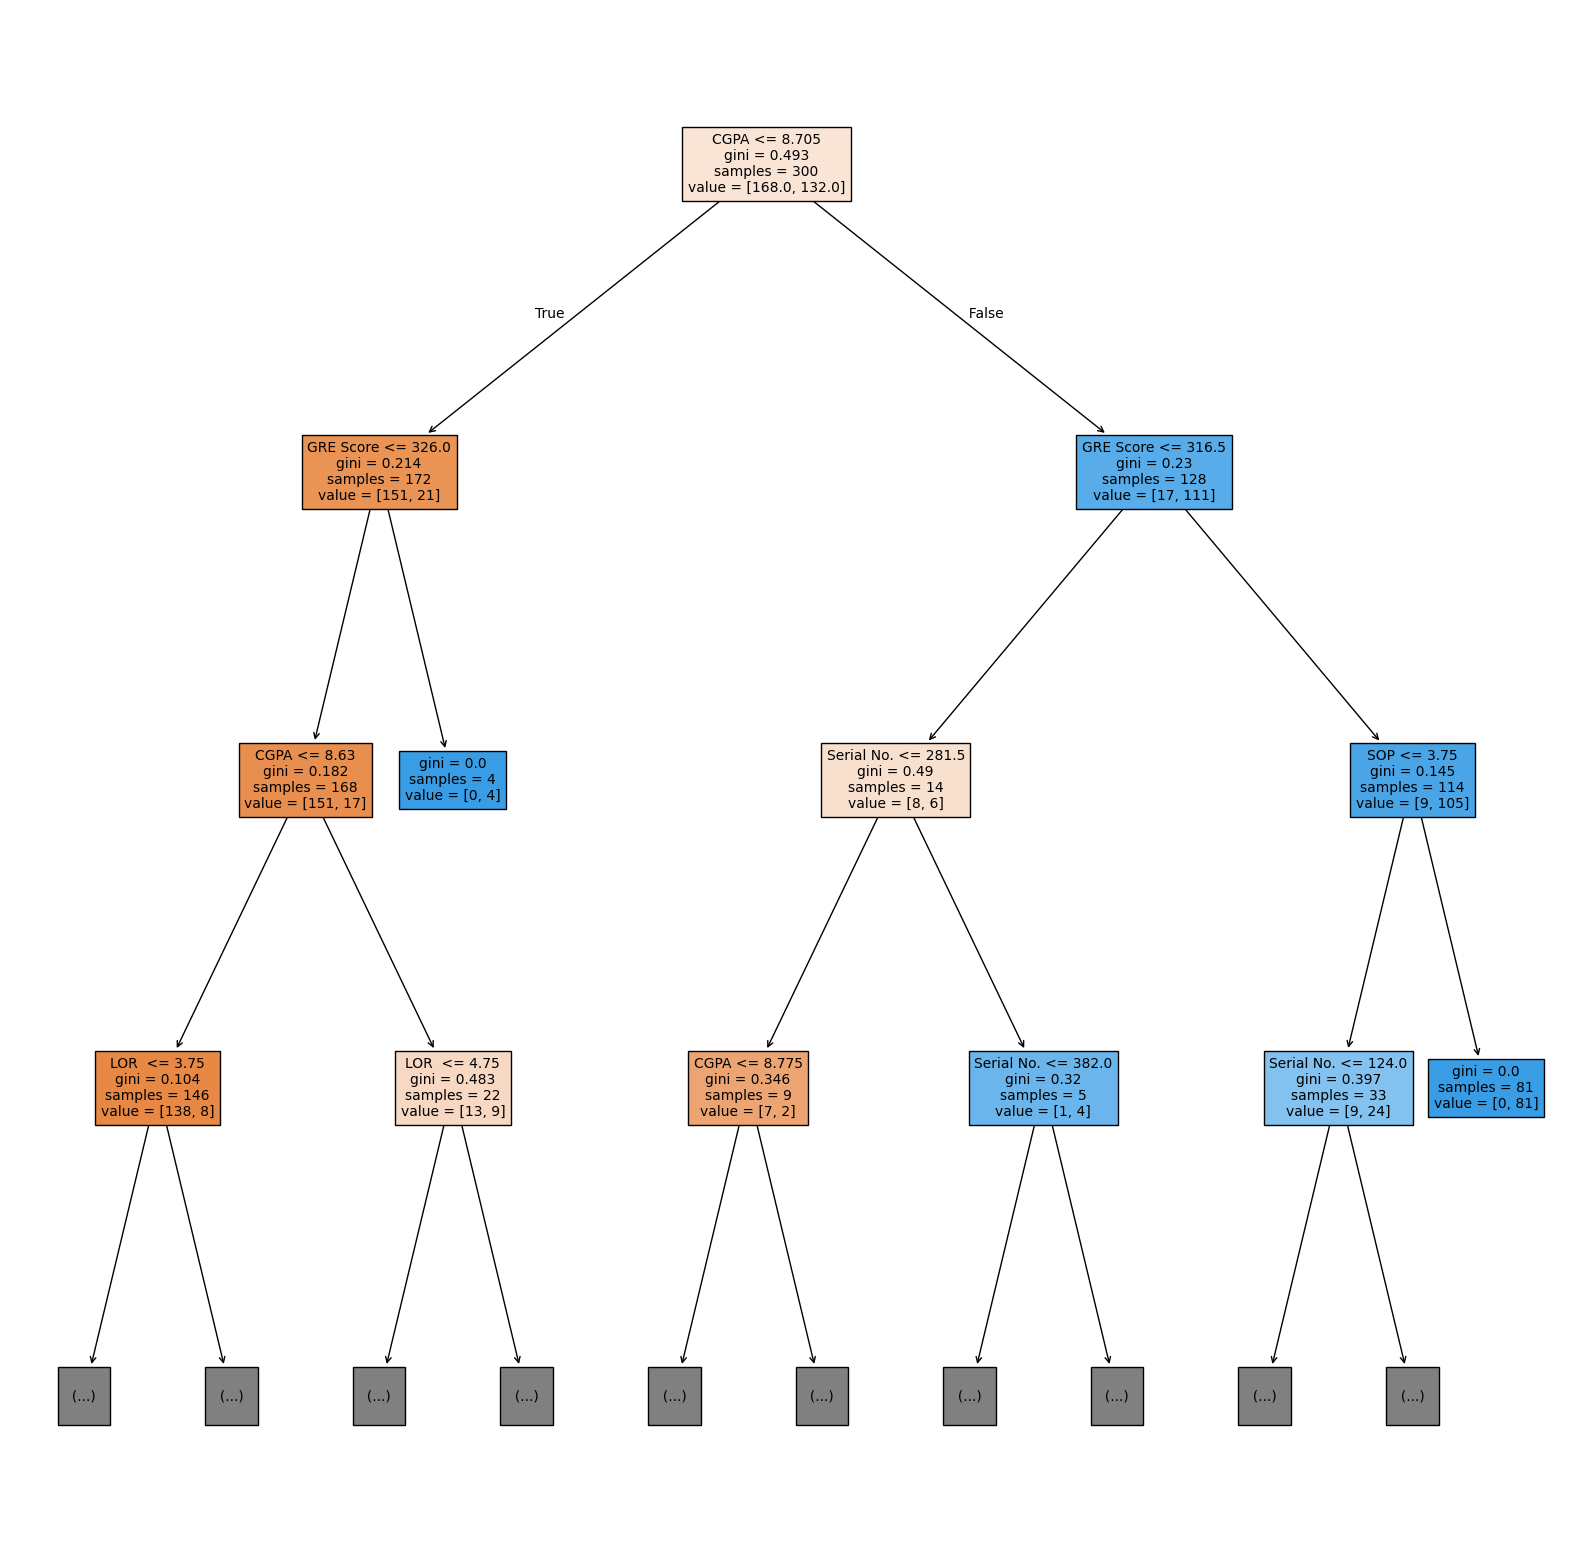

In [ ]:
plt.figure(figsize=(20,20))
plot_tree(decision,filled=True,feature_names=input.columns,fontsize=10, max_depth = 3)